In [ ]:
!pip install numpy matplotlib seaborn tensorflow scikit-learn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

Found 3188 images belonging to 2 classes.
Found 798 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 1208s 6s/step - accuracy: 0.7591 - loss: 0.5790 - val_accuracy: 0.7632 - val_loss: 0.5247
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 177ms/step - accuracy: 0.7605 - loss: 0.5418 - val_accuracy: 0.7632 - val_loss: 0.5500
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 40s 174ms/step - accuracy: 0.7511 - loss: 0.5717 - val_accuracy: 0.7632 - val_loss: 0.5518
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 35s 175ms/step - accuracy: 0.7706 - loss: 0.5327 - val_accuracy: 0.7632 - val_loss: 0.5523
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 37s 182ms/step - accuracy: 0.7691 - loss: 0.5447 - val_accuracy: 0.7632 - val_loss: 0.5404
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 39s 173ms/step - accuracy: 0.7707 - loss: 0.5257 - val_accuracy: 0.7632 - val_loss: 0.4417
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - accuracy: 0.7585 - loss: 0.4780 - val_accuracy: 0.7769 - val_loss: 0.4350
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 35s 174ms/step - accuracy: 0.7712 - loss: 0.4493 - val_

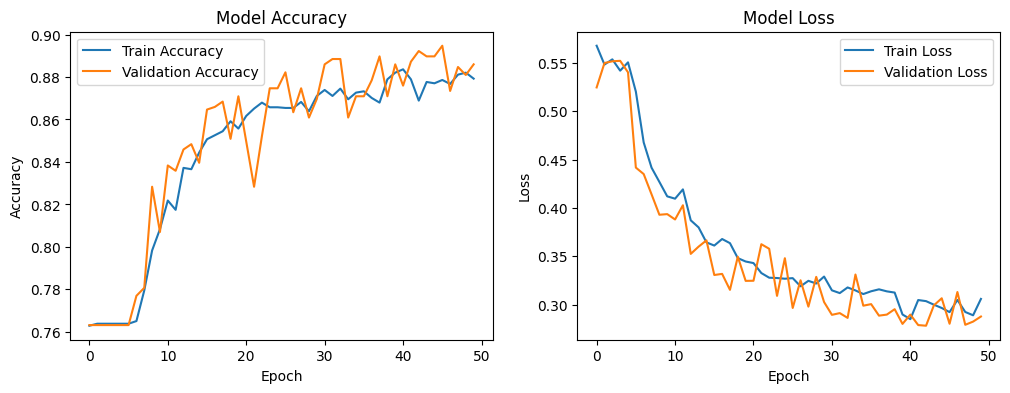

50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step
Classification Report
              precision    recall  f1-score   support

      galaxy       0.24      0.21      0.23       189
        star       0.76      0.79      0.78       609

    accuracy                           0.66       798
   macro avg       0.50      0.50      0.50       798
weighted avg       0.64      0.66      0.65       798

Confusion Matrix


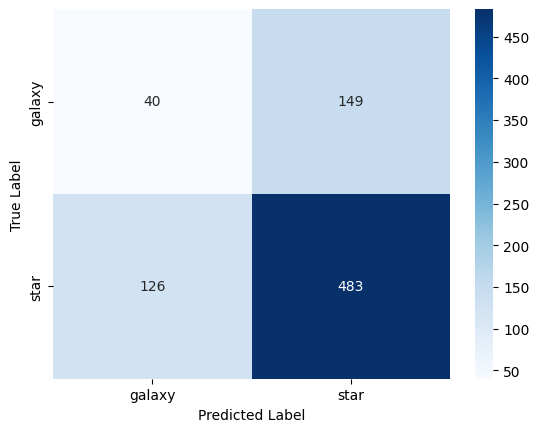

In [ ]:
# Set up directories
train_dir = '/content/drive/MyDrive/mini-project/data/train'
test_dir = '/content/drive/MyDrive/mini-project/data/test'

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.15,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the images from directories
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(64, 64),
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    color_mode='grayscale')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(64, 64),
                                                  batch_size=16,
                                                  class_mode='categorical',
                                                  color_mode='grayscale')

# Build the CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=test_generator)

# Evaluate the model
score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Predict on the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Generate classification report and confusion matrix
print('Classification Report')
target_names = list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/mini-project/model/my_model1.h5')